In [ ]:
!pip install easyocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install pyngrok
!npm install localtunnel


added 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
! pip install streamlit_option_menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3

In [ ]:
def image_to_text(path):

  input_img= Image.open(path)

  #converting image to array formet
  image_arr= np.array(input_img)

  reader= easyocr.Reader(['en'])
  text= reader.readtext(image_arr,detail=0)

  return text , input_img


In [ ]:
text_img, input_img= image_to_text("/content/1.png")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
text_img, input_img= image_to_text("/content/2.png")

In [ ]:
text_img, input_img= image_to_text("/content/3.png")

In [ ]:
text_img, input_img= image_to_text("/content/4.png")

In [ ]:
text_img, input_img= image_to_text("/content/5.png")

In [ ]:
def extracted_text(texts):
  extrd_dict = {"NAME":[], "DESIGNATION":[], "CONTACT":[], "EMAIL":[], "WEBSITE":[],"PINCODE":[],
                "COMPANY_NAME":[],"ADDRESS":[] }

  extrd_dict["NAME"].append(texts[0])
  extrd_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):

    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and '-' in texts[i]):

      extrd_dict["CONTACT"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extrd_dict["EMAIL"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small= texts[i].lower()
      extrd_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or  texts[i].isdigit():

      extrd_dict["PINCODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]',texts[i]):
      extrd_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colon= re.sub(r'[,;]','',texts[i])
      extrd_dict["ADDRESS"].append(remove_colon)


  for key,value in extrd_dict.items():
    if len(value)>0:
      concadenate= " ".join(value)
      extrd_dict[key]=[concadenate]

    else:
      value = "NA"
      extrd_dict[key] = [value]


  return extrd_dict


In [ ]:
text_data=extracted_text(text_img)

In [ ]:
df=pd.DataFrame(text_data)
df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE
0,SANTHOSH,Technical Manager,Sun Electricals,+123-456-1234,hello@Sun.com,www.suncom,NA,"123 ABC St , Tirupur, TamilNadu; 641603"


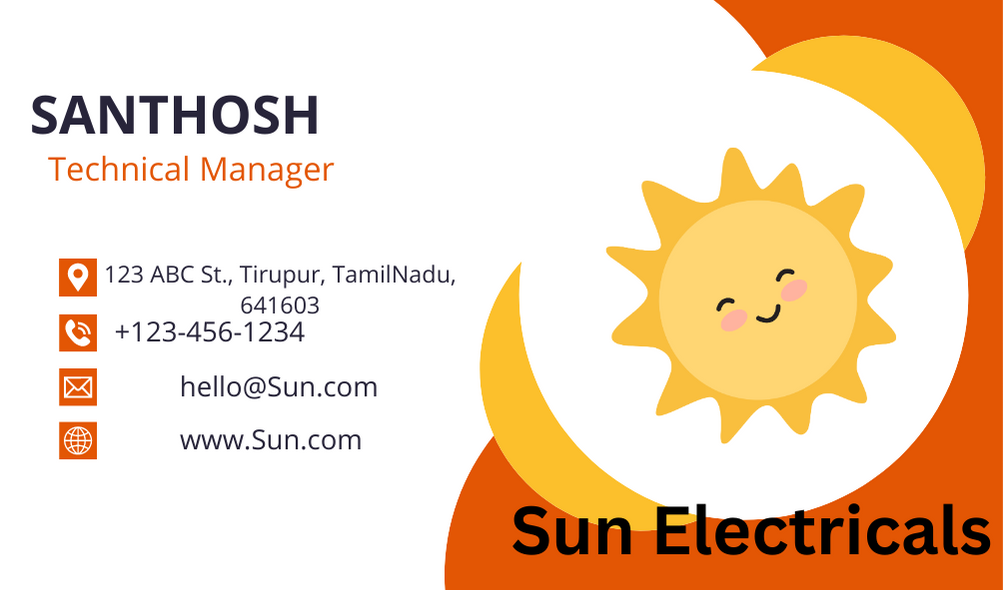

In [ ]:
input_img

In [ ]:
text_img

['SANTHOSH',
 'Technical Manager',
 '123 ABC St , Tirupur, TamilNadu;',
 '641603',
 '+123-456-1234',
 'hello@Sun.com',
 'www.Suncom',
 'Sun Electricals']

In [ ]:
# converting img to bytes
Image_bytes=io.BytesIO()
input_img.save(Image_bytes,format="PNG")
image_data=Image_bytes.getvalue()
image_data
#creating dictionay
data={"IMAGE":[image_data]}

df_1=pd.DataFrame(data)

concat_df=pd.concat([df_1,df],axis=1)
concat_df

,IMAGE,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,SANTHOSH,Technical Manager,Sun Electricals,+123-456-1234,hello@Sun.com,www.suncom,NA,"123 ABC St , Tirupur, TamilNadu; 641603"


In [ ]:
mydb=sqlite3.connect("bizcardx.db")
cursor=mydb.cursor()

#Table Creation

create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(225),

                                                                  designation varchar(225),
                                                                  company_name varchar(225),
                                                                  contact varchar(225),
                                                                  email varchar(225),
                                                                  website text,
                                                                  address text,
                                                                  pincode varchar(225),
                                                                  image text)'''

cursor.execute(create_table_query)
mydb.commit()

In [ ]:
#Insert query
insert_query = '''INSERT INTO bizcard_details(name, designation, company_name,contact, email, website, address,
                                              pincode, image)

                                              values(?,?,?,?,?,?,?,?,?)'''

datas=concat_df.values.tolist()[0]
cursor.execute(insert_query,datas)
mydb.commit()

In [ ]:
#select query
mydb =sqlite3.connect("bizcardx.db")
cursor = mydb.cursor()
select_query = "SELECT NAME FROM bizcard_details"

cursor.execute(select_query)
table = cursor.fetchall()
mydb.commit()

names = []

for i in table:
  names.append(i[0])

names


[b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\x9du\x9c\x1c\xc7\x99\xbf\x9f\xea\xee\xc1\xe5]1Z\xb2$\xcb\xb6\xcc\xcc\x1cS\xc0\x8ec\'1\xe5\x82\x17\xbc\\\xf8\xee\x17\xbc\xbb0\\rafp\xc01\xc7133K\xb2\x98\xa5e\x1aj\xa8\xdf\x1f\xd5\xdd3\xb3 \xedJ+i%\xbd\xcf\'\x13yg\xba\xab\xab\xab\xabg\xfa[/)\xad\xb5F\x10\x04A\x10\x04A\x10\x04t\x10\xa0,\x0b\xaf}-]?\xff \xf9Go\x04\x0b\x94\xe3\x98\xcf\xb5F)\xb5\x9b{)\x08\xc2\xdeJ$\xcf\x9d\x96\x19L\xf9\xe1J\xac\xdd\xdc\x1fA\x10\x04A\x10\x04A\x187(\xcbBk\x8d\xdd<\x83\t\x9f\xba\x81\xba\xd7\xff;\xcaq\xd0\xae\x17\x8bu\xb1w\t\x82\xb0\xab\x10\xc1.\x08\x82 \x08\x82 \x08!\x95\x16\xf4\xa0\xd0O\xe3\xdb\xbfM\xc3\xdb\xff\x0f\xbbe\x1a\xb8\xbe\xb1\xc0+KD\xbb \x08\xbb\x04\x11\xec\x82 \x08\x82 \x08\x82\x10RiA\xb7\xd25\x04\xc5~\xea\xce{?-\xff\xfe\x07\x92\x07\x1c\x8bv\x03\xb4\xef\xc6\xa2]\x84\xbb \x08;\x13\x11\xec\x82 \x08\x82 \x08\x82PAda\xd7Zc\xa5j\xd0n\x81\xd4\xc1\xa73\xf1s\xb7\x93=\xe9b\xb4G,\xda\

In [ ]:
df_3 = table_df[table_df["NAME"] == "SANTHOSH"]
df_3

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE,IMAGE


In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3


def image_to_text(path):

  input_img= Image.open(path)

  #converting image to array formet
  image_arr= np.array(input_img)

  reader= easyocr.Reader(['en'])
  text= reader.readtext(image_arr, detail= 0)

  return text, input_img


def extracted_text(texts):

  extrd_dict = {"NAME":[], "DESIGNATION":[], "COMPANY_NAME":[], "CONTACT":[], "EMAIL":[], "WEBSITE":[],
                "ADDRESS":[], "PINCODE":[]}

  extrd_dict["NAME"].append(texts[0])
  extrd_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):

    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and '-' in texts[i]):

      extrd_dict["CONTACT"].append(texts[i])

    elif "@" in texts[i] and ".com" in texts[i]:
      extrd_dict["EMAIL"].append(texts[i])

    elif "WWW" in texts[i] or "www" in texts[i] or "Www" in texts[i] or "wWw" in texts[i] or "wwW" in texts[i]:
      small= texts[i].lower()
      extrd_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():
      extrd_dict["PINCODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]', texts[i]):
      extrd_dict["COMPANY_NAME"].append(texts[i])

    else:
      remove_colon= re.sub(r'[,;]','',texts[i])
      extrd_dict["ADDRESS"].append(remove_colon)

  for key,value in extrd_dict.items():
    if len(value)>0:
      concadenate= " ".join(value)
      extrd_dict[key] = [concadenate]

    else:
      value = "NA"
      extrd_dict[key] = [value]

  return extrd_dict


#Streamlit part

st.set_page_config(layout = "wide")
st.title("EXTRACTING BUSINESS CARD DATA WITH 'OCR'")

with st.sidebar:

  select= option_menu("Main Menu", ["Home", "Upload & Modifying", "Delete"])

if select == "Home":
  st.markdown("### :blue[**Technologies Used :**] Python,easy OCR, Streamlit, SQL, Pandas")



  st.write(
            "### :green[**About :**] Bizcard is a Python application designed to extract information from business cards.")
  st.write(
            '### The main purpose of Bizcard is to automate the process of extracting key details from business card images, such as the name, designation, company, contact information, and other relevant data. By leveraging the power of OCR (Optical Character Recognition) provided by EasyOCR, Bizcard is able to extract text from the images.')

elif select == "Upload & Modifying":
  img = st.file_uploader("Upload the Image", type= ["png","jpg","jpeg"])

  if img is not None:
    st.image(img, width= 300)

    text_image, input_img= image_to_text(img)

    text_dict = extracted_text(text_image)

    if text_dict:
      st.success("TEXT IS EXTRACTED SUCCESSFULLY")

    df= pd.DataFrame(text_dict)

    #Converting Image to Bytes

    Image_bytes = io.BytesIO()
    input_img.save(Image_bytes, format= "PNG")

    image_data = Image_bytes.getvalue()

    #Creating Dictionary
    data = {"IMAGE":[image_data]}

    df_1 = pd.DataFrame(data)

    concat_df = pd.concat([df,df_1],axis= 1)

    st.dataframe(concat_df)

    button_1 = st.button("Save", use_container_width = True)

    if button_1:

      mydb = sqlite3.connect("bizcardx.db")
      cursor = mydb.cursor()

      #Table Creation

      create_table_query = '''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(225),

                                                                          designation varchar(225),
                                                                          company_name varchar(225),
                                                                          contact varchar(225),
                                                                          email varchar(225),
                                                                          website text,
                                                                          address text,
                                                                          pincode varchar(225),
                                                                          image text)'''

      cursor.execute(create_table_query)
      mydb.commit()

      # Insert Query

      insert_query = '''INSERT INTO bizcard_details(name, designation, company_name,contact, email, website, address,pincode, image)values(?,?,?,?,?,?,?,?,?)'''

      datas = concat_df.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()
      st.success("SAVED SUCCESSFULLY")

  method =  st.radio("Select the Method",["None","Preview","Modify"])

  if method == "None":
    st.write("")

  if method == "Preview":
    mydb = sqlite3.connect("bizcardx.db")
    cursor = mydb.cursor()

    #select query
    select_query = "SELECT * FROM bizcard_details"

    cursor.execute(select_query)
    table = cursor.fetchall()
    mydb.commit()

    table_df = pd.DataFrame(table, columns=("NAME", "DESIGNATION", "COMPANY_NAME", "CONTACT", "EMAIL", "WEBSITE",
                                            "ADDRESS", "PINCODE", "IMAGE"))
    st.dataframe(table_df)

  elif method == "Modify":

    mydb = sqlite3.connect("bizcardx.db")
    cursor = mydb.cursor()

    #select query
    select_query = "SELECT * FROM bizcard_details"

    cursor.execute(select_query)
    table = cursor.fetchall()
    mydb.commit()

    table_df = pd.DataFrame(table, columns=("NAME", "DESIGNATION", "COMPANY_NAME", "CONTACT", "EMAIL", "WEBSITE",
                                            "ADDRESS", "PINCODE", "IMAGE"))

    col1,col2 = st.columns(2)
    with col1:

      selected_name = st.selectbox("Select the name", table_df["NAME"])

    df_3 = table_df[table_df["NAME"] == selected_name]

    df_4 = df_3.copy()

    col1,col2 = st.columns(2)
    with col1:
      mo_name = st.text_input("Name", df_3["NAME"].unique()[0])
      mo_desi = st.text_input("Designation", df_3["DESIGNATION"].unique()[0])
      mo_com_name = st.text_input("Company_name", df_3["COMPANY_NAME"].unique()[0])
      mo_contact = st.text_input("Contact", df_3["CONTACT"].unique()[0])
      mo_email = st.text_input("Email", df_3["EMAIL"].unique()[0])

      df_4["NAME"] = mo_name
      df_4["DESIGNATION"] = mo_desi
      df_4["COMPANY_NAME"] = mo_com_name
      df_4["CONTACT"] = mo_contact
      df_4["EMAIL"] = mo_email

    with col2:

      mo_website = st.text_input("Website", df_3["WEBSITE"].unique()[0])
      mo_addre = st.text_input("Address", df_3["ADDRESS"].unique()[0])
      mo_pincode = st.text_input("Pincode", df_3["PINCODE"].unique()[0])
      mo_image = st.text_input("Image", df_3["IMAGE"].unique()[0])

      df_4["WEBSITE"] = mo_website
      df_4["ADDRESS"] = mo_addre
      df_4["PINCODE"] = mo_pincode
      df_4["IMAGE"] = mo_image

    st.dataframe(df_4)

    col1,col2= st.columns(2)
    with col1:
      button_3 = st.button("Modify", use_container_width = True)

    if button_3:

      mydb = sqlite3.connect("bizcardx.db")
      cursor = mydb.cursor()

      cursor.execute(f"DELETE FROM bizcard_details WHERE NAME = '{selected_name}'")
      mydb.commit()

      # Insert Query

      insert_query = '''INSERT INTO bizcard_details(name, designation, company_name,contact, email, website, address,
                                                    pincode, image)

                                                    values(?,?,?,?,?,?,?,?,?)'''

      datas = df_4.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()

      st.success("MODIFYED SUCCESSFULLY")



elif select == "Delete":

  mydb = mysqlite3.connect("bizcardx.db")
  cursor = mydb.cursor()

  col1,col2 = st.columns(2)
  with col1:

    select_query = "SELECT NAME FROM bizcard_details"

    cursor.execute(select_query)
    table1 = cursor.fetchall()
    mydb.commit()

    names = []

    for i in table1:
      names.append(i[0])

    name_select = st.selectbox("Select the name", names)

  with col2:

    select_query = f"SELECT DESIGNATION FROM bizcard_details WHERE NAME ='{name_select}'"

    cursor.execute(select_query)
    table2 = cursor.fetchall()
    mydb.commit()

    designations = []

    for j in table2:
      designations.append(j[0])

    designation_select = st.selectbox("Select the designation", options = designations)

  if name_select and designation_select:
    col1,col2,col3 = st.columns(3)

    with col1:
      st.write(f"Selected Name : {name_select}")
      st.write("")
      st.write("")
      st.write("")
      st.write(f"Selected Designation : {designation_select}")

    with col2:
      st.write("")
      st.write("")
      st.write("")
      st.write("")

      remove = st.button("Delete", use_container_width= True)

      if remove:

        cursor.execute(f"DELETE FROM bizcard_details WHERE NAME ='{name_select}' AND DESIGNATION = '{designation_select}'")
        mydb.commit()

        st.warning("DELETED")



2024-08-25 09:05:34.124 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-25 09:05:34.128 Session state does not function when running a script without `streamlit run`


In [ ]:
# prompt: run this in streamlit

!streamlit run /content/my_app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.97.65:8501

your url is: https://puny-clowns-cheat.loca.lt
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This modul

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.42.97.65


In [ ]:
!streamlit run /content/my_app.py  & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 

In [ ]:
# prompt: run this as a streamlit code

!streamlit run /content/my_app.py  & npx localtunnel --port 8501


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/my_app.py
your url is: https://quiet-forks-serve.loca.lt
^C
